In [1]:
# Titanic Survival Prediction: Complete Python Code

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [2]:
#Load and Explore the Data
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [3]:
# Display basic information and summary statistics
print("Training Data Info:\n")
print(train_data.info())
print("\nTesting Data Info:\n")
print(test_data.info())
print("\nTraining Data Summary:\n", train_data.describe())

Training Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Testing Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

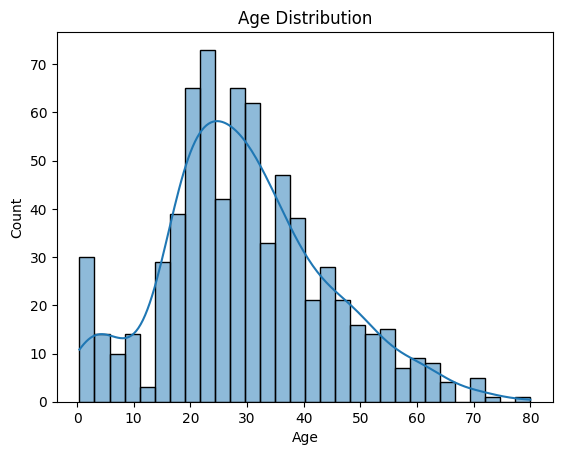

In [4]:
# Visualize distributions of numerical features
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

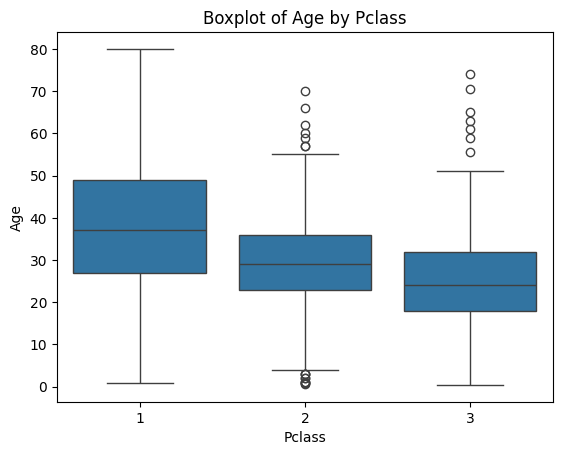

In [5]:
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.title("Boxplot of Age by Pclass")
plt.show()

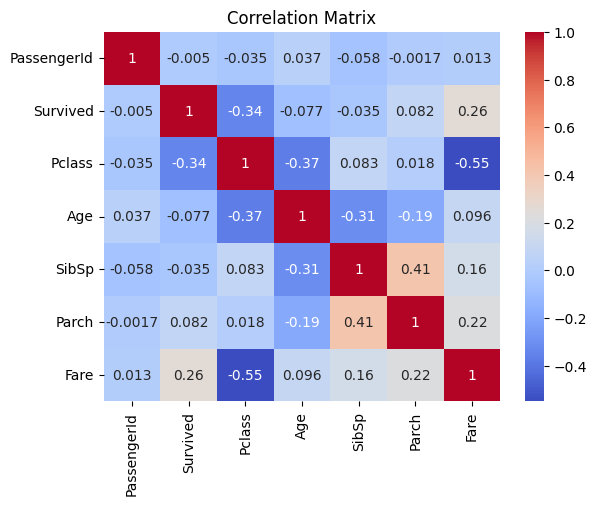

In [6]:
sns.heatmap(train_data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Step 2: Data Preprocessing
# Drop irrelevant columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_data_cleaned = train_data.drop(columns=columns_to_drop)
test_data_cleaned = test_data.drop(columns=columns_to_drop)

In [8]:
# Handle missing values
train_data_cleaned['Age'].fillna(train_data_cleaned['Age'].median(), inplace=True)
test_data_cleaned['Age'].fillna(test_data_cleaned['Age'].median(), inplace=True)
train_data_cleaned['Embarked'].fillna(train_data_cleaned['Embarked'].mode()[0], inplace=True)
test_data_cleaned['Fare'].fillna(test_data_cleaned['Fare'].median(), inplace=True)

<ipython-input-8-2ca3fcb32a6e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_cleaned['Age'].fillna(train_data_cleaned['Age'].median(), inplace=True)
<ipython-input-8-2ca3fcb32a6e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [9]:
# Encode categorical variables using one-hot encoding
train_data_encoded = pd.get_dummies(train_data_cleaned, columns=['Sex', 'Embarked'], drop_first=True)
test_data_encoded = pd.get_dummies(test_data_cleaned, columns=['Sex', 'Embarked'], drop_first=True)


In [10]:
# Align test dataset with training dataset
missing_cols = set(train_data_encoded.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0
test_data_encoded = test_data_encoded[train_data_encoded.columns.drop('Survived')]


In [11]:
# Split features and target
X_train = train_data_encoded.drop('Survived', axis=1)
y_train = train_data_encoded['Survived']


In [12]:

# Step 3: Model Building
# Split training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [13]:
# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
# Step 4: Model Evaluation
# Predict on the validation set
y_val_pred = logistic_model.predict(X_val)
y_val_prob = logistic_model.predict_proba(X_val)[:, 1]


In [15]:
# Evaluate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_prob)
classification_rep = classification_report(y_val, y_val_pred)


In [16]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8044692737430168
Precision: 0.7931034482758621
Recall: 0.6666666666666666
F1-Score: 0.7244094488188977
ROC-AUC: 0.8442687747035573
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



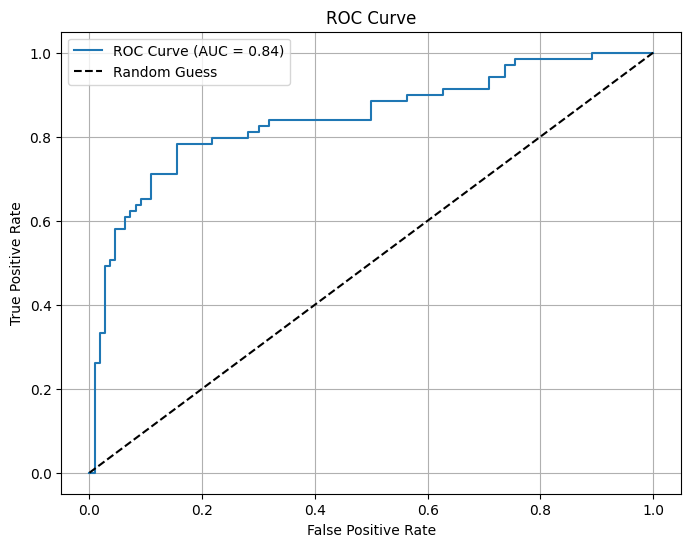

In [17]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Step 5: Interpretation
# Coefficients of the model
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print("Feature Importance:\n", coefficients)

Feature Importance:
       Feature  Coefficient
6  Embarked_Q     0.280834
4        Fare     0.002236
1         Age    -0.038569
3       Parch    -0.071224
2       SibSp    -0.244283
7  Embarked_S    -0.382989
0      Pclass    -1.092315
5    Sex_male    -2.558438


In [19]:
# Predictions on the test set
test_predictions = logistic_model.predict(test_data_encoded)
test_probabilities = logistic_model.predict_proba(test_data_encoded)[:, 1]

In [20]:
# Output predictions
test_output = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})
test_output.to_csv('titanic_test_predictions.csv', index=False)
print("Predictions saved to titanic_test_predictions.csv")

Predictions saved to titanic_test_predictions.csv
